In [33]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install super_gradients
!pip install Roboflow
!pip install torchinfo

  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.4 requires pyparsing==2.4.7, but you have pyparsing 2.4.5 which is incompatible.


  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.2.0 requires pyparsing==2.4.5, but you have pyparsing 2.4.7 which is incompatible.


In [ ]:
from super_gradients.training import models

yolo_nas_s = models.get("yolo_nas_s",pretrained_weights="coco")

[2023-09-04 13:36:32] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-09-04 13:36:33] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [ ]:
from torchinfo import summary


summary(model= yolo_nas_s
        ,input_size=(16,3,640,640),col_names = ["input_size", "output_size","num_params","trainable"],col_width=10,row_settings = ["var_names"])

Layer (type (var_name))                                           Input Shape Output Shape Param #    Trainable
YoloNAS_S (YoloNAS_S)                                             [16, 3, 640, 640] [16, 8400, 4] --         True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640] [16, 96, 160, 160] --         True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640] [16, 48, 320, 320] --         True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640] [16, 48, 320, 320] 3,024      True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320] [16, 96, 160, 160] --         True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320] [16, 96, 160, 160] 88,128     True
│    │    └─YoloNASCSPLayer (blocks)                              [16, 96, 160, 160] [16, 96, 160, 160] 91,202     True
│    └─YoloNASStage (stage2)                             

In [ ]:
import super_gradients
from super_gradients.training import models
from super_gradients.training import Trainer
import torch

model = models.get("yolo_nas_l",pretrained_weights = "coco")
model = model.to("cuda" if torch.cuda.is_available()else "cpu")
Checkpoints = 'checkpoints'
trainer = Trainer(experiment_name = 'first_try', ckpt_root_dir= Checkpoints)



from roboflow import Roboflow
rf = Roboflow(api_key="ypb4QLq8yOmJ9EAvjQKT")
project = rf.workspace("berkeela").project("hardhatsample")
dataset = project.version(2).download("yolov5")




[2023-09-04 13:36:40] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-09-04 13:36:42] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

# DATASET SET UP
The parameters below are required for the configuration of the dataset. These parameters are mostly easy to understand due to the connection between their name and function, however, the batch size and num_workers parameters can be tough to understand. In addition to that the batch size parameter can be declared like this:
In the context of training a neural network, the dataset is typically divided into smaller subsets or batches, and each batch is processed through the network one after the other. Moreover, when it comes to the  num_worker parameter, this parameter specifies the number of worker processes to use for data loading. Using multiple worker processes can help speed up data loading by parallelizing the loading and preprocessing of images



In [ ]:
CLASSES = sorted(project.classes.keys())
BATCH_SIZE = 16
dataset_params = {
              'data_dir':'/content/HardHatSample-2',
              'train_images_dir':'train/images',
              'train_labels_dir':'train/labels',
              'val_images_dir':'valid/images',
              'val_labels_dir':'valid/labels',
              'test_images_dir':'test/images',
              'test_labels_dir':'test/labels',
              'classes': CLASSES
}


train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)


test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':BATCH_SIZE,
        'num_workers':2
    }
)





[2023-09-04 13:36:54] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 210/210 [00:00<00:00, 6135.44it/s]
[2023-09-04 13:36:54] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 20/20 [00:00<00:00, 5274.20it/s]


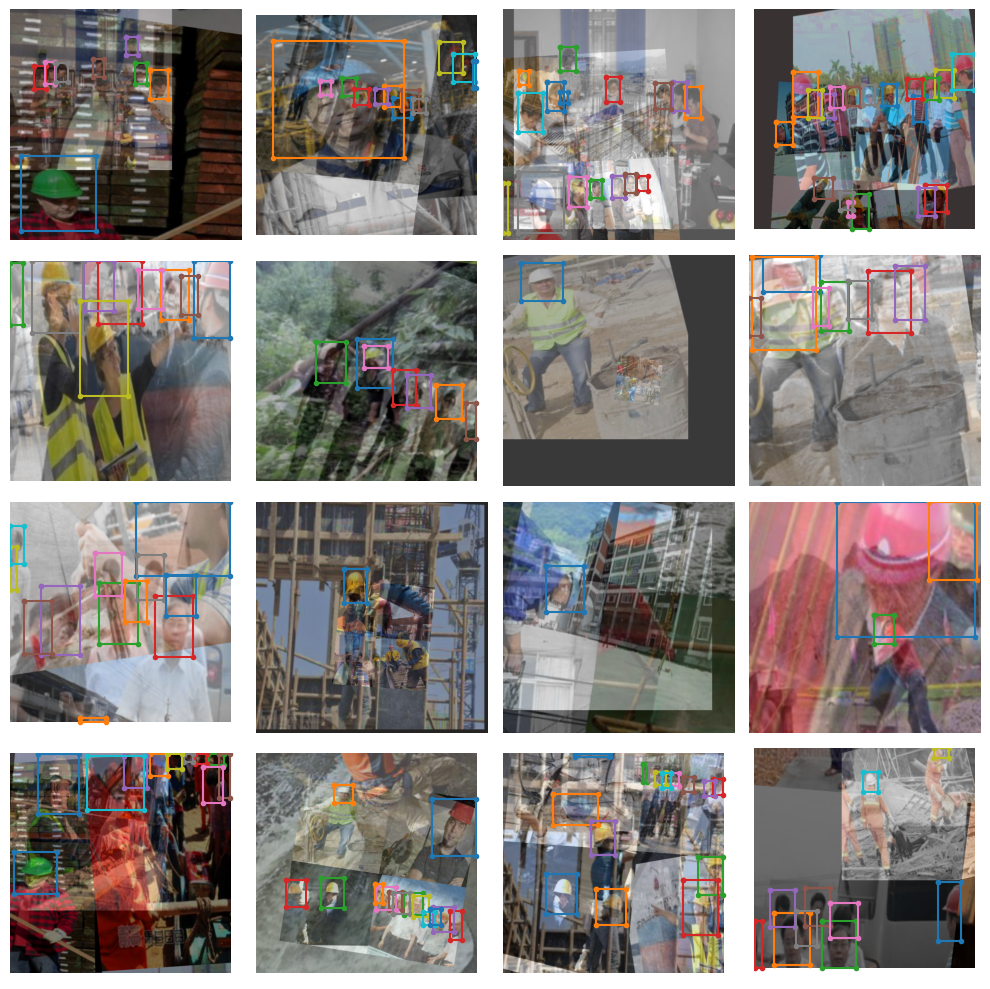

In [ ]:
train_data.dataset.dataset_params["transforms"][1]
train_data.dataset.dataset_params["transforms"][1]["DetectionRandomAffine"]["degrees"] = 10.42
train_data.dataset.plot()


# MODEL.GET() METHOD
The very first parameter of the list is the model name that's going to load, then, the second parameter is number of classes as can already be seen, next , the parameter of pretrained_weight is initial weights of the model. 'coco' likely refers to weights pretrained on the COCO (Common Objects in Context) dataset. Last bu not least we have arch_parameters. these parameters and their functionalty are given to below:

	arch parameters:

		num_classes = number of classes to predict :: any integer

		depth_mult_factor = depth multiplier for the entire model :: any integer

		width_mult_factor = width multiplier for the entire model :: any integer

		channels_in = Number of channels that the input image has :: 2,3

		skip_connections_list = A list defining skip connections :: [[12, [6]], [16, [4]], [19, [14]], [22, [10]], [24, [17, 20]]], any pair

		backbone_connection_channels = width of the backbone channels that are concatenated with the head ::[1024, 512, 256] (In deep learning, a backbone is a pre-trained 	neural network that serves as a starting point to build a larger architecture)
  
		scaled_backbone_width = True if width_mult_factor is applied to the backbone :: True, False

		fuse_conv_and_bn = Fuse Sequential Convolution :: True, False

		add_nms= Add the NMS module for creating the computational graph :: True, False

		nms_conf=  When add_nms is True during NMS predictions with confidence lower than this will be discarded :: any float(most likely smaller than 1)

		nms_iou =  When add_nms is True Intersection over Union threshold for NMS algorithm :: any float(most likely in range (0,1))

		yolo_type = Type of yolo to build :: 'yoloX' is the only type currently supported

		stem_type = ::'focus' and  '6x6' are supported

		depthwise = usable for separate to seperable convolutional layers

		xhead_inter_channels= Channels in classification and regression branches of the detecting blocks :: has an impact only if yolo_type is yoloX

		xhead_groups = Num groups in convs in classification and regression branches of the detecting blocks (1 for Conv and depthwise for GroupedConvBlock) (has an impact only if yolo_type is yoloX)

In [ ]:
from super_gradients.training import models
model = models.get('yolo_nas_s',num_classes = len(dataset_params["classes"]),pretrained_weights ='coco')

[2023-09-04 13:37:06] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-09-04 13:37:06] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback


# TRAINING PARAMETERS
Few mandatory parameters:


```
max_epoch : max number of the epochs

loss : loss function

optimizer : optimizer that you will be using in your model {it can be one of these: Adam , SGD, Lion, RMSProps}

train_metrics_list: metrics to log during training

valid_metrics_list : metrics to log during validating

metric_to_watch : metric which the model checkpoint will be saved according to

```

# Other optional parameters:

**resume**: False : Whether to continue training from ckpt from the latest run, within the same experiment name.

**run_id**:  {some sort of ID}     : ID of run to resume from the same experiment.

**resume_path**: "path" : Explicit checkpoint path (.pth file) to use to resume training.

**resume_from_remote_sg_logger**: False : (default=False), When true continue with remote sg logger, ckpt_name (checkpoint filename)

**ckpt_name**: "ckpt_latest.pth" : The checkpoint (.pth file) filename in CKPT_ROOT_DIR/EXPERIMENT_NAME/ to use when resume=True and resume_path=None

**lr_mode**:

          {Union[str, Mapping]
          when str: Learning rate scheduling policy, one of ['step','poly','cosine','function']
          when Mapping: refers to a torch.optim.lr_scheduler._LRScheduler, following the below API: lr_mode = {LR_SCHEDULER_CLASS_NAME: {**LR_SCHEDULER_KWARGS, "phase": XXX, "metric_name": XXX)}


**lr_schedule_function**: {corresponding float value} :Learning rate scheduling function to be used when `lr_mode` is 'function'.

**lr_warmup_epochs**: 0 : number of epochs for learning rate warm up

**lr_warmup_steps**: 0  : number of warmup steps (Used when warmup_mode=linear_batch_step)

**lr_cooldown_epochs**: 0 : epochs to cooldown LR (i.e the last epoch from scheduling view point=max_epochs-cooldown)

**warmup_initial_lr**: Initial lr for linear_epoch_step/linear_batch_step. When none is given, initial_lr/(warmup_epochs+1) will be used.

**step_lr_update_freq**: (float) update frequency in epoch units for computing lr_updates when lr_mode=`step`.

**cosine_final_lr_ratio**: 0.01 : final learning rate ratio (only relevant when `lr_mode`='cosine')

**warmup_mode**: linear_epoch_step : learning rate warmup scheme, currently 'linear_epoch_step' and 'linear_batch_step' are supported

**lr_updates**:
  This is a workaround to instantiate a list using _target_. If we would instantiate as "lr_updates: []",
# ❗❗❗ Note we would get an error every time we would want to overwrite lr_updates with a numpy array ❗❗❗

**pre_prediction_callback**: : callback modifying images and targets right before forward pass.

**optimizer_params**: {} : when `optimizer` is one of ['Adam','SGD','RMSProp'], it will be initialized with optimizer_params.

**load_opt_params**: True : Whether to load the optimizers parameters as well when loading a model's checkpoint

**zero_weight_decay_on_bias_and_bn**: False : whether to apply weight decay on batch normalization parameters or not

**criterion_params**: {} : when `loss` is one of SuperGradient's built in options, it will be initialized with criterion_params.


**ema**: False : whether to use Model Exponential Moving Average

**ema_params**: : parameters for the ema model.
  decay: 0.9999
  decay_type: exp
  beta: 15

**greater_metric_to_watch_is_better**: True : When choosing a model's checkpoint to be saved, the best achieved model is the one that maximizes the metric_to_watch when this parameter is set to True

**launch_tensorboard**: False :Whether to launch a TensorBoard process.

**tensorboard_port**: {Port Config} : port for tensorboard process.

**tb_files_user_prompt**: False : Asks User for Tensorboard Deletion Prompt.

**save_tensorboard_to_s3**: False : whether to save tb to s3.

**precise_bn**: False : Whether to use precise_bn calculation during the training.

**precise_bn_batch_size**: : the effective batch size we want to calculate the batchnorm on.

**sync_bn**: False : Whether to convert bn layers to synched bn (for accurate stats in DDP).

**silent_mode**: False  : Silents the Print outs

**mixed_precision**: False : Whether to use mixed precision or not.

**save_ckpt_epoch_list**: [ ]  : indices where the ckpt will save automatically

**average_best_models**: True : If set, a snapshot dictionary file and the average model will be saved

**dataset_statistics**: False  : add a dataset statistical analysis and sample images to tensorboard

**batch_accumulate**: 1  : number of batches to accumulate before every backward pass

**run_validation_freq**: 1 : The frequency in which validation is performed during training.

**run_test_freq**: 1 : The frequency in which test is performed during training.

**save_model**: True : Whether to save the model checkpoints

**seed**: 42 : seed for reproducibility

**phase_callbacks**: [] : list of callbacks to be applied at specific phases.

**log_installed_packages**: True : when set, the list of all installed packages will be written to the tensorboard

**clip_grad_norm** : {corresponding float value} : Defines a maximal L2 norm of the gradients. Values which exceed the given value will be clipped

**ckpt_best_name**: ckpt_best.pth: it's obvious enough i think

**max_train_batches**: {None or some sort of integer value} :For debug- when not None- will break out of inner train loop

**max_valid_batches**:  : For debug- when not None- will break out of inner valid loop

**sg_logger**: base_sg_logger

# sg_logger_params:
  **tb_files_user_prompt**: False : Asks User for Tensorboard Deletion Prompt.

  **launch_tensorboard**: False : Launching tensorboard.

  **tensorboard_port**: {Some sort of integer port value} : Dedicating a port to tensorboard.

  **save_checkpoints_remote**: False  : upload checkpoint files to s3.

  **save_tensorboard_remote**: False  : upload tensorboard files to s3.

  **save_logs_remote**: False  : upload log files to s3.

  **monitor_system**: True  : Monitor and write to tensorboard the system statistics.

**torch_compile**: False : Enable or disable use of torch.compile to optimize the model. (Requires Pytorch 2.0)

**torch_compile_loss**: False  : Enable or disable use of torch.compile to optimize the loss.  (Requires Pytorch 2.0)

# torch_compile_options:

  **mode**: reduce-overhead ▶ default / reduce-overhead / max-autotune

  **fullgraph**: False      ▶ Whether it is ok to break model into several subgraphs

  **dynamic**: False        ▶ Use dynamic shape tracing

  **backend**: inductor     ▶ backend to be used

  **options**: { a dictionary} ▶ A dictionary of options to pass to the backend.

  **disable**: False        ▶ Turn torch.compile() into a no-op for testing




In [ ]:
train_params = {
    'silent_mode' :True,
    'average_best_models':True,
    'warmup_mode' : 'linear_epoch_step',
    'warmup_initial_lr' :1e-6,
    'lr_warmup_epochs' :3,
    'initial_lr' :5e-4,
    'lr_mode' : 'cosine',
    'optimizer': 'Adam',
    'optimizer_params':{"weight_decay":0.001},
    'zero_weight_decay_on_bias_and_bn':True,
    'ema' : True,
    'ema_params': {'decay':0.9, 'decay_type': 'threshold'},
    'max_epochs': 15,
    'mixed_precision':True,
    'loss':PPYoloELoss(use_static_assigner =False, num_classes = len(dataset_params['classes']),reg_max =16),
    'valid_metrics_list':[DetectionMetrics_050(score_thres=0.1,top_k_predictions=300,num_cls=len(dataset_params['classes']),normalize_targets=True,
    post_prediction_callback=PPYoloEPostPredictionCallback(
        score_threshold=0.01,
        nms_top_k=1000,
        max_predictions=300,
        nms_threshold=0.7
        )
      )
    ],
    "metric_to_watch":"mAP@0.50"
}

In [ ]:
trainer.train(
    model = model,
    training_params= train_params,
    train_loader=train_data,
    valid_loader=val_data

)

The console stream is now moved to checkpoints/first_try/console_Sep04_13_37_11.txt


[2023-09-04 13:37:12] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2023-09-04 13:37:17] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 210        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         13         (len(train_loader))
    - Gradient updates per epoch:   13         (len(train_loader) / batch_accumulate)

[2023-09-04 13:37:36] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/first_try/ckpt_best.pth
[2023-09-04 13:37:36] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP

In [ ]:
#getting the best model
best_model = models.get('yolo_nas_s',num_classes = len(dataset_params['classes']),checkpoint_path="checkpoints/first_try/average_model.pth")

In [ ]:
trainer.test(model=best_model,
             test_loader=test_data,
             test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                    top_k_predictions=300,
                                                    num_cls = len(dataset_params['classes']),
                                                    normalize_targets=True,
                                                    post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                           nms_top_k=1000,
                                                                                                           max_predictions=300,
                                                                                                           nms_threshold=0.7)

) )

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

{'PPYoloELoss/loss_cls': 0.910081,
 'PPYoloELoss/loss_iou': 0.26304865,
 'PPYoloELoss/loss_dfl': 1.090202,
 'PPYoloELoss/loss': 2.1128037,
 'Precision@0.50': 0.05044613033533096,
 'Recall@0.50': 0.9075000286102295,
 'mAP@0.50': 0.7670199275016785,
 'F1@0.50': 0.09505137801170349}

Testing: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


[2023-09-04 13:45:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


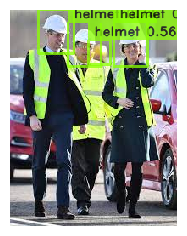

In [ ]:
url = "/content/indir.jpeg"
best_model.predict(url).show()